İmport neccesary libraries

In [1]:
#Can Berk Durak
#canberk.cbd@gmail.com
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Analyze and Understand the Dataset

In [2]:
df = pd.read_excel('/content/side_effect_data 1.xlsx')
df.info()
df.head()
df.describe()
df.describe(include=['object'])


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2357 entries, 0 to 2356
Data columns (total 19 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   Kullanici_id                      2357 non-null   int64         
 1   Cinsiyet                          1579 non-null   object        
 2   Dogum_Tarihi                      2357 non-null   datetime64[ns]
 3   Uyruk                             2357 non-null   object        
 4   Il                                2130 non-null   object        
 5   Ilac_Adi                          2357 non-null   object        
 6   Ilac_Baslangic_Tarihi             2357 non-null   datetime64[ns]
 7   Ilac_Bitis_Tarihi                 2357 non-null   datetime64[ns]
 8   Yan_Etki                          2357 non-null   object        
 9   Yan_Etki_Bildirim_Tarihi          2357 non-null   datetime64[ns]
 10  Alerjilerim                       1873 non-null 

,Cinsiyet,Uyruk,Il,Ilac_Adi,Yan_Etki,Alerjilerim,Kronik Hastaliklarim,Baba Kronik Hastaliklari,Anne Kronik Hastaliklari,Kiz Kardes Kronik Hastaliklari,Erkek Kardes Kronik Hastaliklari,Kan Grubu
count,1579,2357,2130,2357,2357,1873,1965,2201,2140,2260,2236,2010
unique,2,1,13,151,22,28,80,92,84,85,90,8
top,Female,Turkiye,Adana,chlordiazepoxide-amitriptyline,Agizda Farkli Bir Tat,Domates,"Alzheimer, Diger","Alzheimer, Diyabet","Alzheimer, Astim",,,AB RH-
freq,872,2357,220,29,229,118,61,64,110,168,136,421


In [4]:
df.duplicated().sum()

0

Check the missing data and anomalies if exists


In [3]:
def detect_missing_data(df):
    missing_data = df.isnull().sum()
    missing_percentage = (df.isnull().sum() / len(df)) * 100
    missing_df = pd.DataFrame({'Missing Count': missing_data, 'Missing Percentage (%)': missing_percentage})
    missing_df = missing_df[missing_df['Missing Count'] > 0]
    print("Missing Data in the Dataset (after handling '#'):")
    print(missing_df)

In [5]:
def detect_anomalies(df):
    anomalies = {}
    for col in df.select_dtypes(include=[np.number]).columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        anomaly_count = df[(df[col] < lower_bound) | (df[col] > upper_bound)].shape[0]
        anomalies[col] = anomaly_count

    anomalies_df = pd.DataFrame({'Anomaly Count': anomalies.values()}, index=anomalies.keys())
    print("\nDetected Anomalies in Numerical Columns:")
    print(anomalies_df)

In [6]:
def detect_invalid_categories(df, categorical_columns, expected_values_dict):
    for col in categorical_columns:
        invalid_values = df[~df[col].isin(expected_values_dict[col])]
        if not invalid_values.empty:
            print(f"\nInvalid values found in column '{col}':")
            print(invalid_values[col].unique())

Handling Missing Data

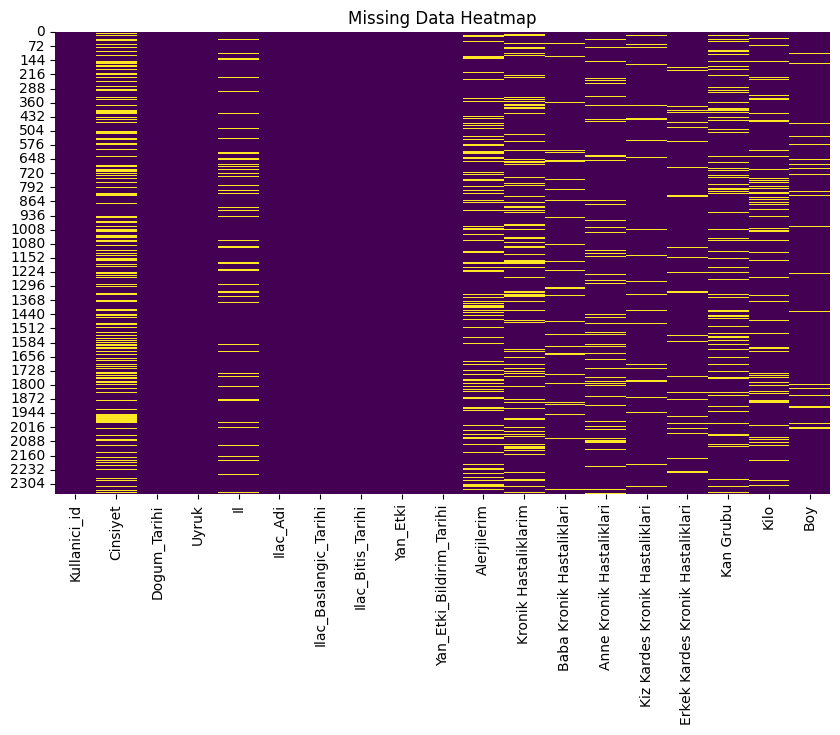

Kullanici_id                         0.000000
Cinsiyet                            33.008061
Dogum_Tarihi                         0.000000
Uyruk                                0.000000
Il                                   9.630887
Ilac_Adi                             0.000000
Ilac_Baslangic_Tarihi                0.000000
Ilac_Bitis_Tarihi                    0.000000
Yan_Etki                             0.000000
Yan_Etki_Bildirim_Tarihi             0.000000
Alerjilerim                         20.534578
Kronik Hastaliklarim                16.631311
Baba Kronik Hastaliklari             6.618583
Anne Kronik Hastaliklari             9.206619
Kiz Kardes Kronik Hastaliklari       4.115401
Erkek Kardes Kronik Hastaliklari     5.133644
Kan Grubu                           14.722104
Kilo                                12.431056
Boy                                  4.836657
dtype: float64


In [7]:
missing_data = df.isnull().sum()

plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Data Heatmap')
plt.show()
missing_percentage = (df.isnull().sum() / df.shape[0]) * 100
print(missing_percentage)


Determine the most prescribed drugs

Top 10 Most Prescribed Drugs:
Ilac_Adi
chlordiazepoxide-amitriptyline                             29
lurasidone                                                 27
hydrocortisone cream                                       27
loxapine                                                   26
desvenlafaxine succinate tablet, extended release 24 hr    26
carbamazepine extended release                             25
methylphenidate hcl solution                               25
betamethasone dipropionate aerosol, spray with pump        24
desonide lotion                                            24
Levomilnacipran                                            24
Name: count, dtype: int64


<ipython-input-10-4c23169e0abd>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y='Ilac_Adi', order=df['Ilac_Adi'].value_counts().index[:10], palette="viridis")


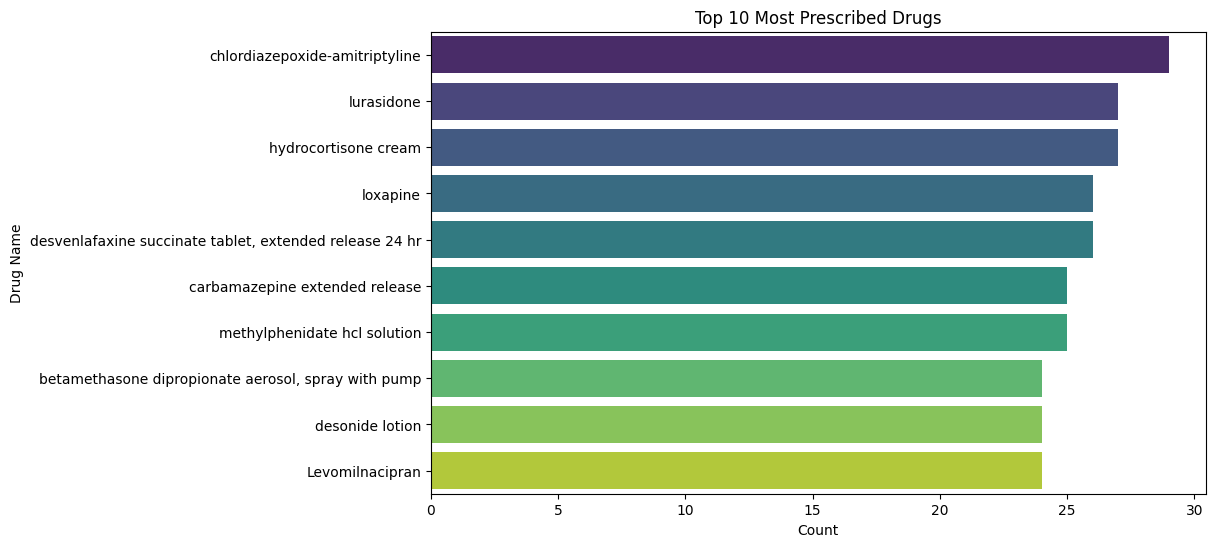

In [10]:
print("Top 10 Most Prescribed Drugs:")
print(df['Ilac_Adi'].value_counts().head(10))

plt.figure(figsize=(10, 6))
sns.countplot(data=df, y='Ilac_Adi', order=df['Ilac_Adi'].value_counts().index[:10], palette="viridis")
plt.title('Top 10 Most Prescribed Drugs')
plt.xlabel('Count')
plt.ylabel('Drug Name')
plt.show()


Determine the most common side effects

In [13]:
print("\nTop 10 Most Common Side Effects:")
print(df['Yan_Etki'].value_counts().head(10))

plt.figure(figsize=(10, 6))
sns.countplot(data=df, y='Yan_Etki', order=df['Yan_Etki'].value_counts().index[:10], palette="magma")
plt.title('Top 10 Most Common Side Effects')
plt.xlabel('Count')
plt.ylabel('Side Effect')
plt.show()


Top 10 Most Common Side Effects:


Analyze the side effect gender disturbition

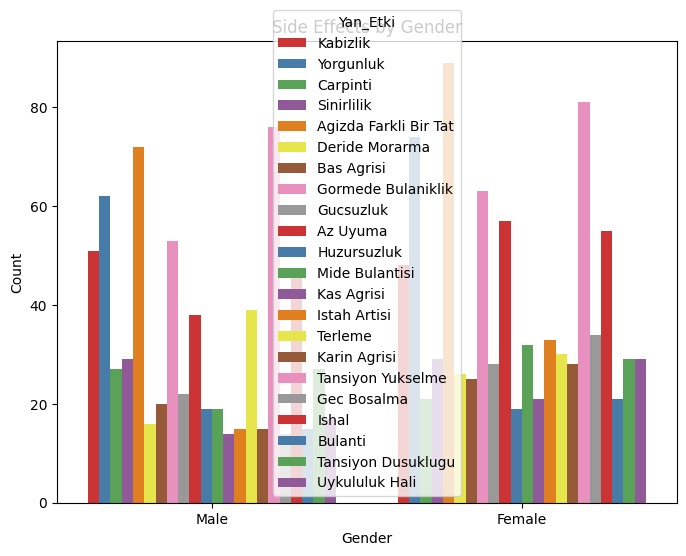

In [14]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Cinsiyet', hue='Yan_Etki', palette='Set1')
plt.title('Side Effects by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

Analyze the chronic illeness


Top 10 Chronic Illnesses in Female Siblings:
Kiz Kardes Kronik Hastaliklari
                             168
Kanser, Hipertansiyon         70
Alzheimer, Astim              61
Kanser                        61
Guatr                         59
Diyabet, Kan Hastaliklari     57
Kan Hastaliklari              53
Kemik Erimesi, Alzheimer      52
Astim, Diyabet                51
Kemik Erimesi                 51
Name: count, dtype: int64


<ipython-input-15-3df5f9488c1d>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y='Kiz Kardes Kronik Hastaliklari', order=df['Kiz Kardes Kronik Hastaliklari'].value_counts().index[:10], palette="rocket")


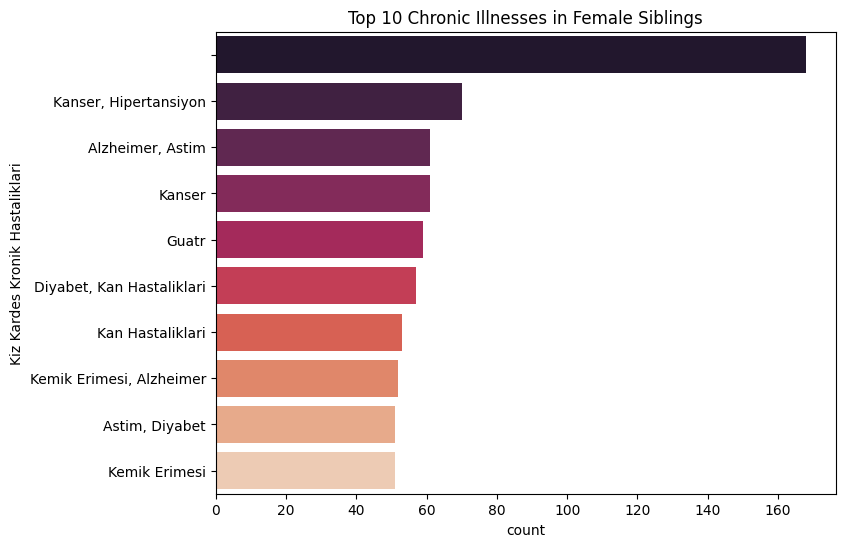


Top 10 Chronic Illnesses in Male Siblings:
Erkek Kardes Kronik Hastaliklari
                                    136
Kemik Erimesi                        71
Diger                                68
Alzheimer, Astim                     51
Alzheimer                            49
Kemik Erimesi, Kalp Hastaliklari     47
Diyabet, Astim                       47
Kan Hastaliklari, Kanser             46
Kanser, Kan Hastaliklari             46
Kan Hastaliklari, Kemik Erimesi      45
Name: count, dtype: int64


<ipython-input-15-3df5f9488c1d>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y='Erkek Kardes Kronik Hastaliklari', order=df['Erkek Kardes Kronik Hastaliklari'].value_counts().index[:10], palette="cool")


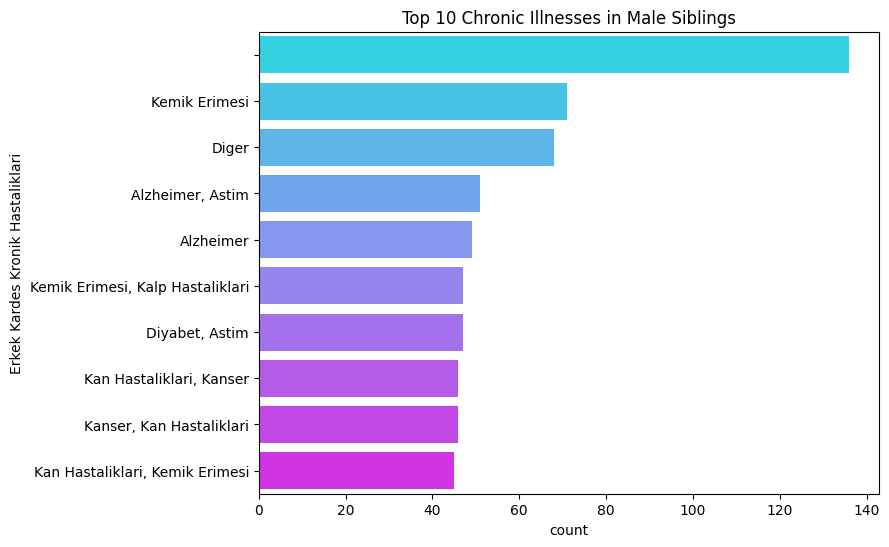

In [15]:
if 'Kiz Kardes Kronik Hastaliklari' in df.columns:
    print("\nTop 10 Chronic Illnesses in Female Siblings:")
    print(df['Kiz Kardes Kronik Hastaliklari'].value_counts().head(10))

    plt.figure(figsize=(8, 6))
    sns.countplot(data=df, y='Kiz Kardes Kronik Hastaliklari', order=df['Kiz Kardes Kronik Hastaliklari'].value_counts().index[:10], palette="rocket")
    plt.title('Top 10 Chronic Illnesses in Female Siblings')
    plt.show()

if 'Erkek Kardes Kronik Hastaliklari' in df.columns:
    print("\nTop 10 Chronic Illnesses in Male Siblings:")
    print(df['Erkek Kardes Kronik Hastaliklari'].value_counts().head(10))

    plt.figure(figsize=(8, 6))
    sns.countplot(data=df, y='Erkek Kardes Kronik Hastaliklari', order=df['Erkek Kardes Kronik Hastaliklari'].value_counts().index[:10], palette="cool")
    plt.title('Top 10 Chronic Illnesses in Male Siblings')
    plt.show()

**Cross-Analysis**

Drugs and side effects Cross-analysis

In [16]:
drug_side_effect_cross = pd.crosstab(df['Ilac_Adi'], df['Yan_Etki'])
print("\nCross-analysis of Drugs and Side Effects:")
print(drug_side_effect_cross.head())


Cross-analysis of Drugs and Side Effects:
Yan_Etki                Agizda Farkli Bir Tat  Az Uyuma  Bas Agrisi  Bulanti  \
Ilac_Adi                                                                       
Levomilnacipran                             4         0           1        0   
Mometasone furoate                          1         1           0        0   
Prednicarbate cream                         2         0           1        1   
alprazolam                                  2         1           0        0   
alprazolam concentrate                      1         1           0        0   

Yan_Etki                Carpinti  Deride Morarma  Gec Bosalma  \
Ilac_Adi                                                        
Levomilnacipran                0               0            2   
Mometasone furoate             1               0            0   
Prednicarbate cream            0               1            1   
alprazolam                     0               0            0   
alpraz

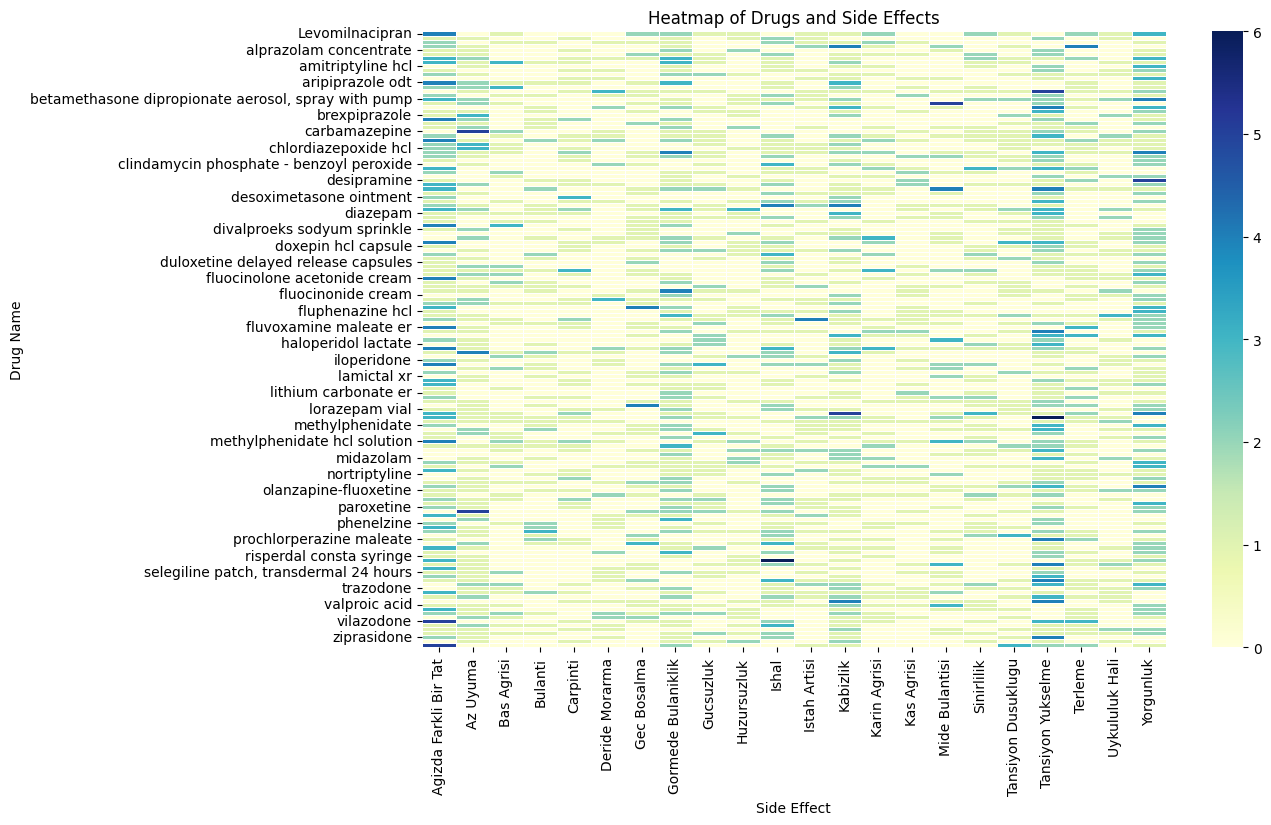

In [17]:
plt.figure(figsize=(12, 8))
sns.heatmap(drug_side_effect_cross, cmap="YlGnBu", linewidths=0.5)
plt.title('Heatmap of Drugs and Side Effects')
plt.xlabel('Side Effect')
plt.ylabel('Drug Name')
plt.show()

Chronic illeneses and side effect cross-analysis

In [18]:
drug_side_effect_cross = pd.crosstab(df['Kronik Hastaliklarim'], df['Yan_Etki'])
print("\nCross-analysis of chronic illeness and Side Effects:")
print(drug_side_effect_cross.head())


Cross-analysis of chronic illeness and Side Effects:
Yan_Etki                  Agizda Farkli Bir Tat  Az Uyuma  Bas Agrisi  \
Kronik Hastaliklarim                                                    
Alzheimer                                     1         1           1   
Alzheimer, Astim                              3         7           1   
Alzheimer, Diger                             12         3           0   
Alzheimer, Guatr                              4         0           0   
Alzheimer, Hipertansiyon                      3         1           1   

Yan_Etki                  Bulanti  Carpinti  Deride Morarma  Gec Bosalma  \
Kronik Hastaliklarim                                                       
Alzheimer                       2         0               0            1   
Alzheimer, Astim                2         2               2            4   
Alzheimer, Diger                0         4               0            2   
Alzheimer, Guatr                1         0           

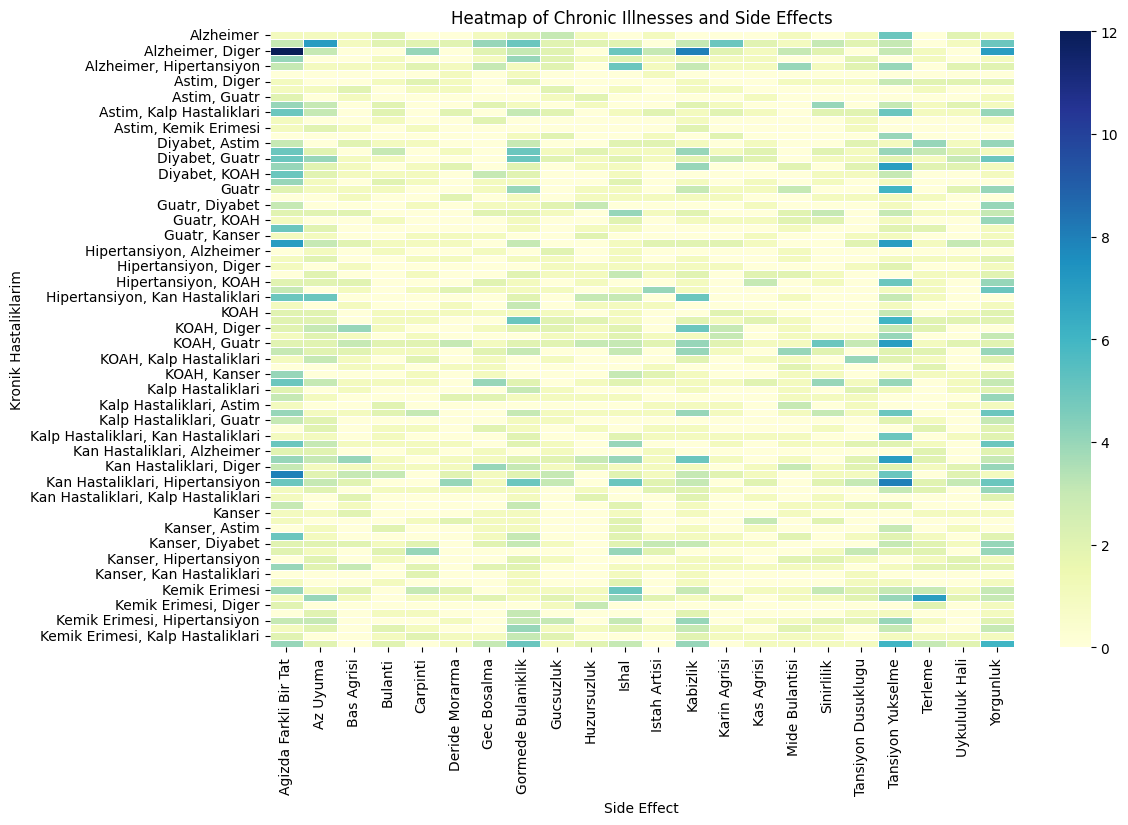

In [19]:
plt.figure(figsize=(12, 8))
sns.heatmap(drug_side_effect_cross, cmap="YlGnBu", linewidths=0.5)
plt.title('Heatmap of Chronic Illnesses and Side Effects')
plt.xlabel('Side Effect')
plt.ylabel('Kronik Hastaliklarim')
plt.show()

Female sibling chronic illenesses and side effects Cross-analysis

In [20]:
drug_side_effect_cross = pd.crosstab(df['Kiz Kardes Kronik Hastaliklari'], df['Yan_Etki'])
print("\nCross-analysis of female sibling chronic illeness and Side Effects:")
print(drug_side_effect_cross.head())


Cross-analysis of female sibling chronic illeness and Side Effects:
Yan_Etki                        Agizda Farkli Bir Tat  Az Uyuma  Bas Agrisi  \
Kiz Kardes Kronik Hastaliklari                                                
                                                   19        12           3   
Alzheimer                                           1         1           0   
Alzheimer, Astim                                    4         3           3   
Alzheimer, Diger                                    0         0           0   
Alzheimer, Diyabet                                  3         2           0   

Yan_Etki                        Bulanti  Carpinti  Deride Morarma  \
Kiz Kardes Kronik Hastaliklari                                      
                                      4         2               6   
Alzheimer                             0         2               1   
Alzheimer, Astim                      2         0               3   
Alzheimer, Diger                

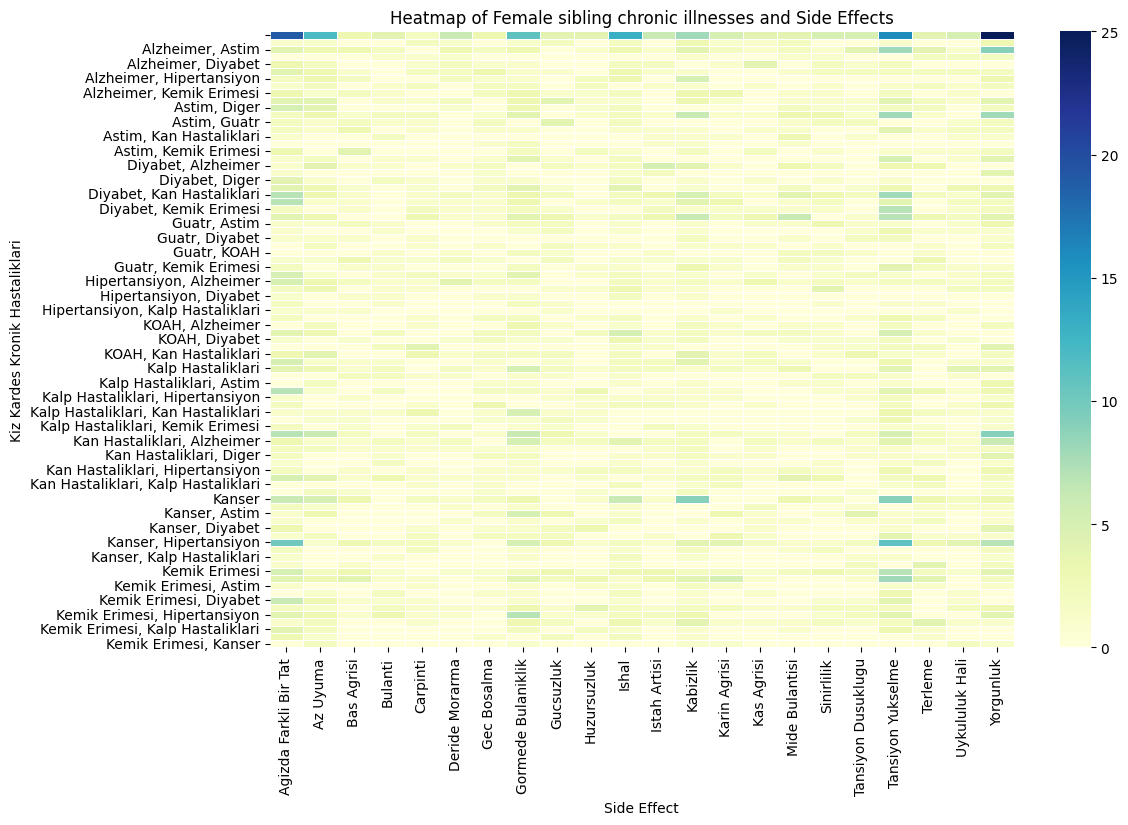

In [21]:
plt.figure(figsize=(12, 8))
sns.heatmap(drug_side_effect_cross, cmap="YlGnBu", linewidths=0.5)
plt.title('Heatmap of Female sibling chronic illnesses and Side Effects')
plt.xlabel('Side Effect')
plt.ylabel('Kiz Kardes Kronik Hastaliklari')
plt.show()

Male sibling chronic illenesses and side effects Cross-analysis

In [22]:
drug_side_effect_cross = pd.crosstab(df['Erkek Kardes Kronik Hastaliklari'], df['Yan_Etki'])
print("\nCross-analysis of male sibling chronic illeness and Side Effects:")
print(drug_side_effect_cross.head())


Cross-analysis of male sibling chronic illeness and Side Effects:
Yan_Etki                          Agizda Farkli Bir Tat  Az Uyuma  Bas Agrisi  \
Erkek Kardes Kronik Hastaliklari                                                
                                                     16         6           8   
Alzheimer                                             6         0           1   
Alzheimer, Astim                                      4         1           0   
Alzheimer, Guatr                                      3         1           0   
Alzheimer, Hipertansiyon                              4         1           0   

Yan_Etki                          Bulanti  Carpinti  Deride Morarma  \
Erkek Kardes Kronik Hastaliklari                                      
                                        3         3               1   
Alzheimer                               4         1               0   
Alzheimer, Astim                        0         2               1   
Alzheimer,

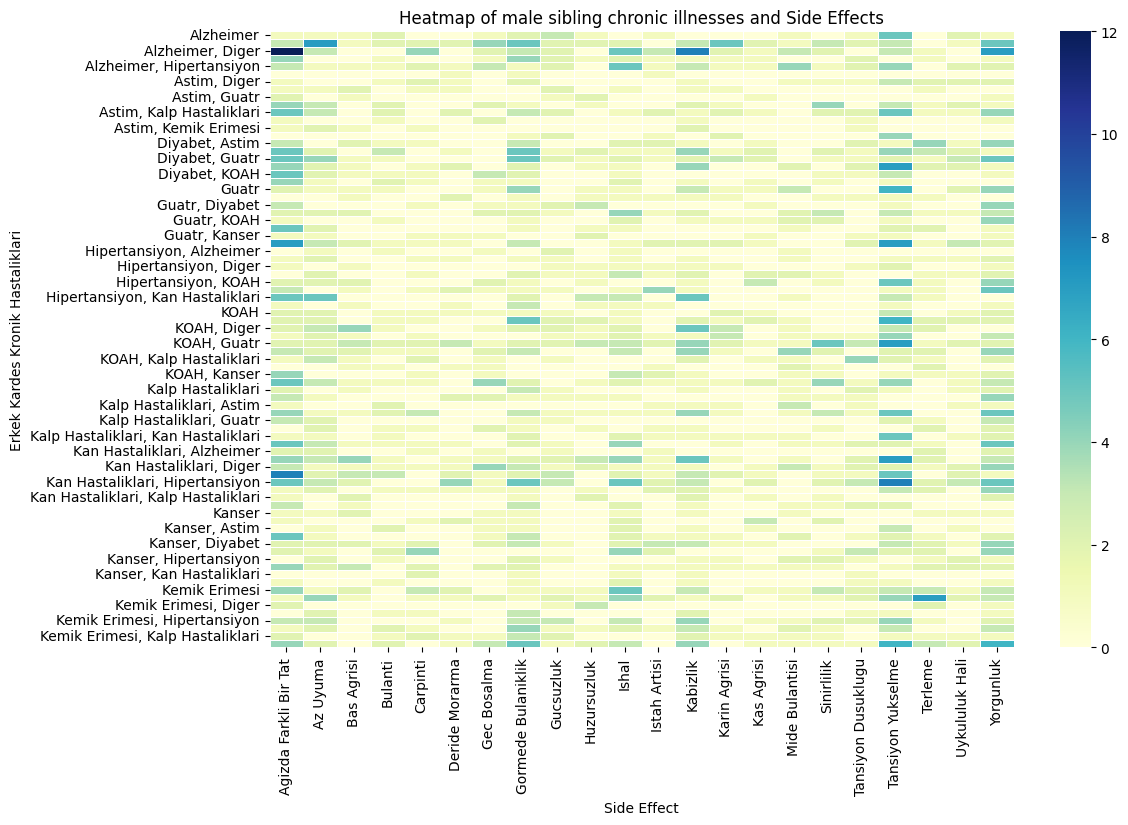

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(drug_side_effect_cross, cmap="YlGnBu", linewidths=0.5)
plt.title('Heatmap of male sibling chronic illnesses and Side Effects')
plt.xlabel('Side Effect')
plt.ylabel('Erkek Kardes Kronik Hastaliklari')
plt.show()

Father chronic illnesses and side effects cross analysis



In [23]:
drug_side_effect_cross = pd.crosstab(df['Baba Kronik Hastaliklari'], df['Yan_Etki'])
print("\nCross-analysis of father chronic illeness and Side Effects:")
print(drug_side_effect_cross.head())


Cross-analysis of father chronic illeness and Side Effects:
Yan_Etki                  Agizda Farkli Bir Tat  Az Uyuma  Bas Agrisi  \
Baba Kronik Hastaliklari                                                
                                              4         2           2   
Alzheimer                                     6         3           4   
Alzheimer, Astim                              1         2           0   
Alzheimer, Diger                              1         0           0   
Alzheimer, Diyabet                            6         6           4   

Yan_Etki                  Bulanti  Carpinti  Deride Morarma  Gec Bosalma  \
Baba Kronik Hastaliklari                                                   
                                3         2               4            1   
Alzheimer                       1         1               0            3   
Alzheimer, Astim                0         0               0            2   
Alzheimer, Diger                1         0    

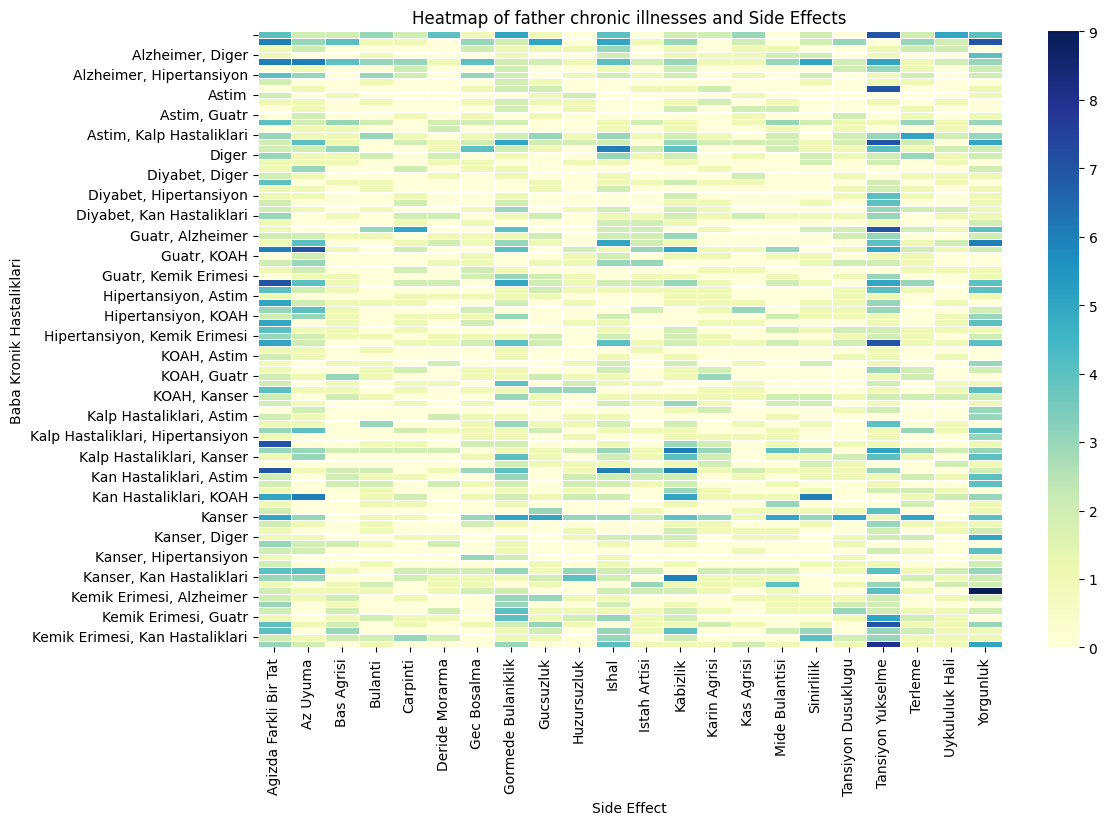

In [24]:
plt.figure(figsize=(12, 8))
sns.heatmap(drug_side_effect_cross, cmap="YlGnBu", linewidths=0.5)
plt.title('Heatmap of father chronic illnesses and Side Effects')
plt.xlabel('Side Effect')
plt.ylabel('Baba Kronik Hastaliklari')
plt.show()

Mother chronic illnesses and side effects cross analysis

In [25]:
drug_side_effect_cross = pd.crosstab(df['Anne Kronik Hastaliklari'], df['Yan_Etki'])
print("\nCross-analysis of mother chronic illeness and Side Effects:")
print(drug_side_effect_cross.head())


Cross-analysis of mother chronic illeness and Side Effects:
Yan_Etki                  Agizda Farkli Bir Tat  Az Uyuma  Bas Agrisi  \
Anne Kronik Hastaliklari                                                
                                              9         4           3   
Alzheimer                                     3         0           3   
Alzheimer, Astim                             10         5           3   
Alzheimer, Diger                              1         0           0   
Alzheimer, Hipertansiyon                      3         3           2   

Yan_Etki                  Bulanti  Carpinti  Deride Morarma  Gec Bosalma  \
Anne Kronik Hastaliklari                                                   
                                1         1               3            0   
Alzheimer                       0         0               2            2   
Alzheimer, Astim                1         0               2            2   
Alzheimer, Diger                0         1    

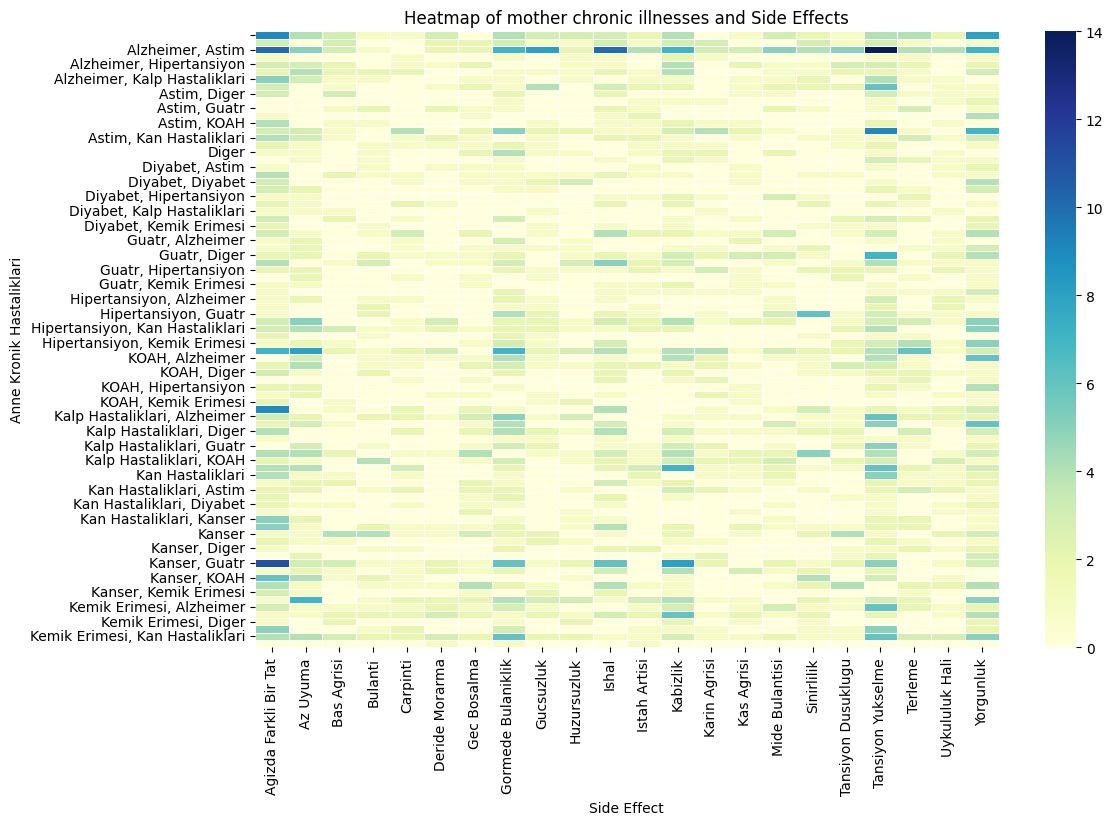

In [26]:
plt.figure(figsize=(12, 8))
sns.heatmap(drug_side_effect_cross, cmap="YlGnBu", linewidths=0.5)
plt.title('Heatmap of mother chronic illnesses and Side Effects')
plt.xlabel('Side Effect')
plt.ylabel('Anne Kronik Hastaliklari')
plt.show()

Gender-based side effect distribution for each drug

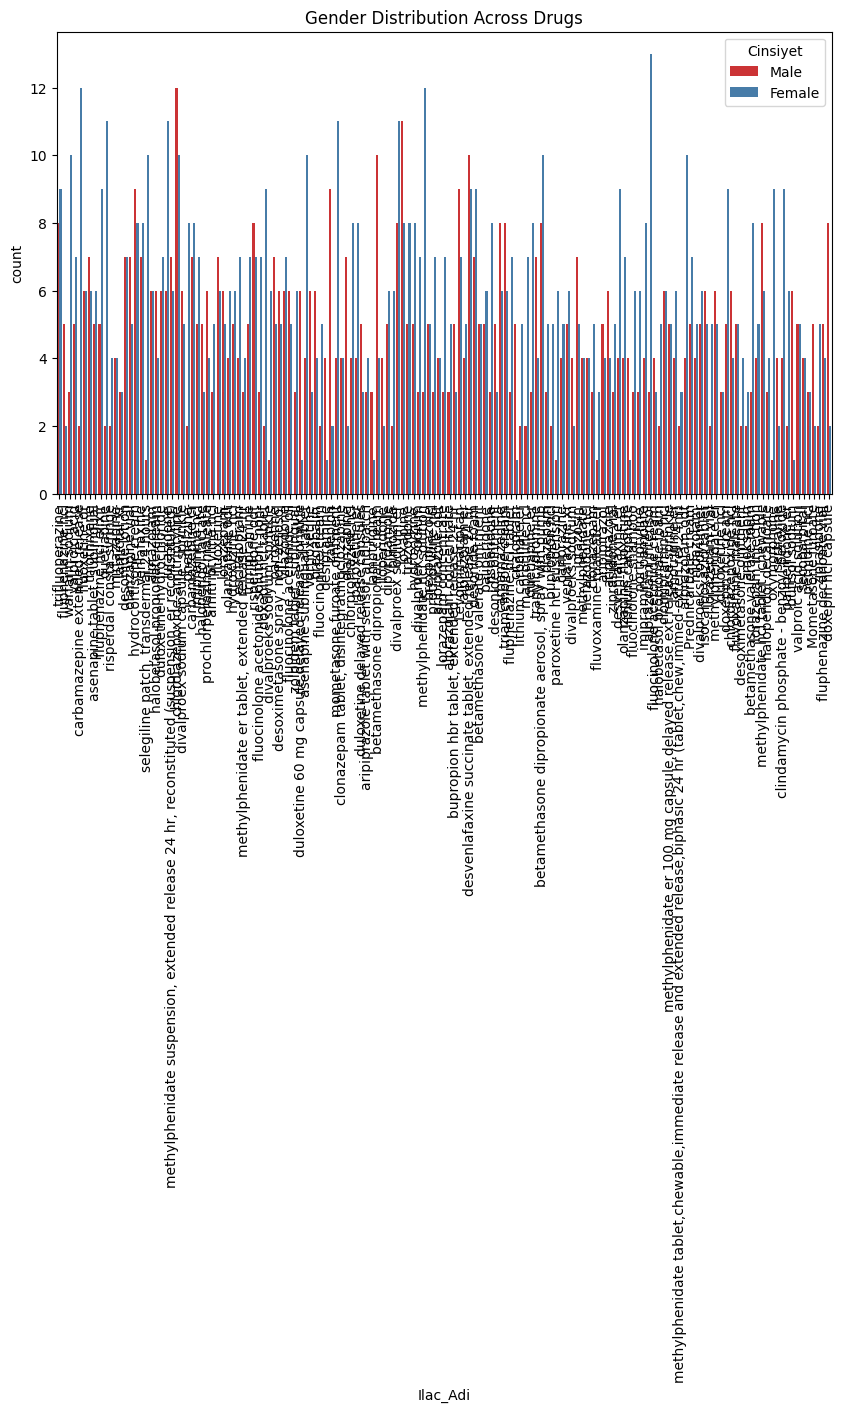

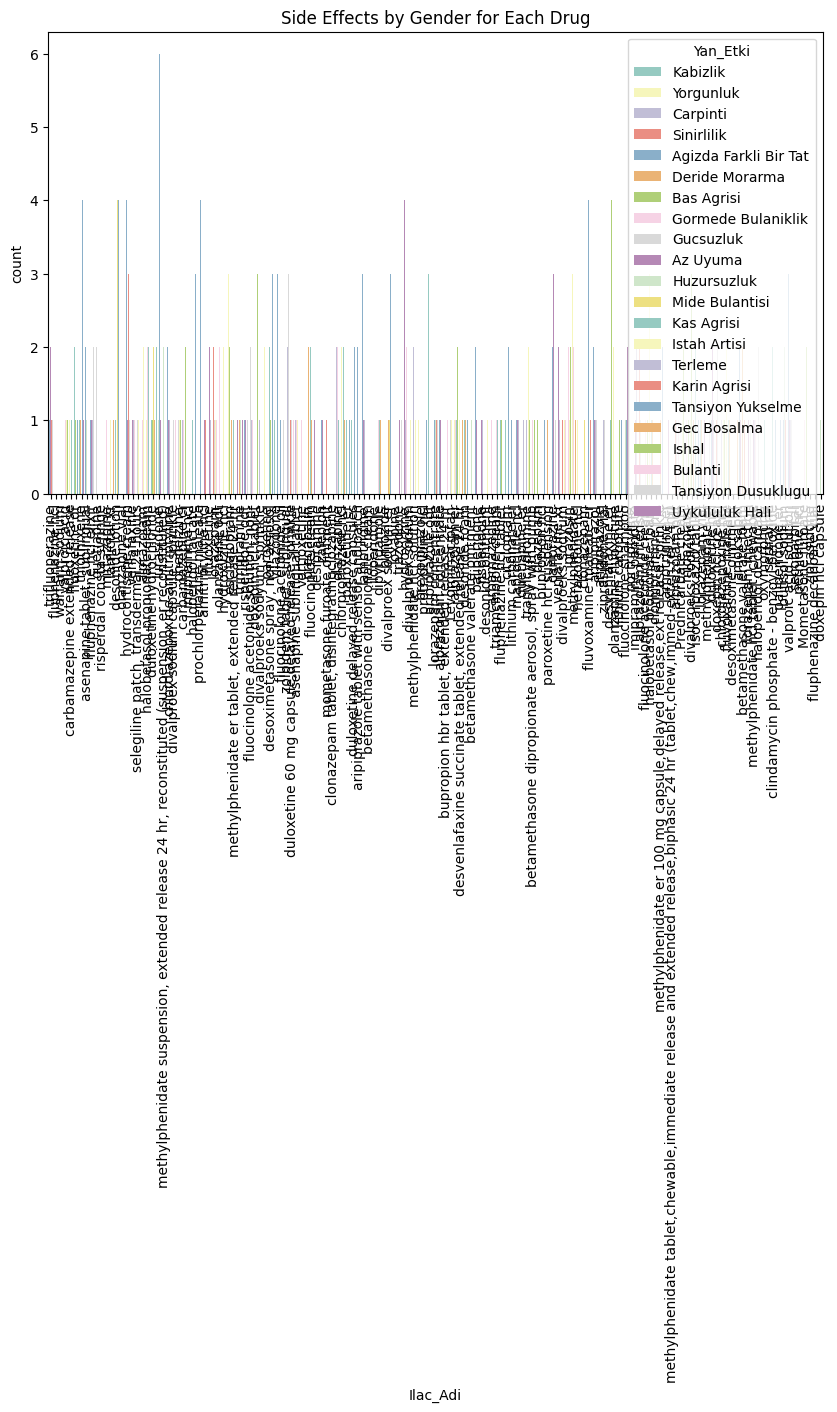

In [27]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Ilac_Adi', hue='Cinsiyet', palette='Set1')
plt.title('Gender Distribution Across Drugs')
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Ilac_Adi', hue='Yan_Etki', palette='Set3')
plt.title('Side Effects by Gender for Each Drug')
plt.xticks(rotation=90)
plt.show()


Allergies and side effects cross analysis


Cross-analysis of Allergies and Side Effects:
Yan_Etki     Agizda Farkli Bir Tat  Az Uyuma  Bas Agrisi  Bulanti  Carpinti  \
Alerjilerim                                                                   
Bal                              7         1           1        1         1   
Balik                            6         7           2        5         1   
Bugday                           4         4           2        0         2   
Ceviz                            5         2           0        1         0   
Cikolata                         3         1           0        2         1   

Yan_Etki     Deride Morarma  Gec Bosalma  Gormede Bulaniklik  Gucsuzluk  \
Alerjilerim                                                               
Bal                       2            0                   2          4   
Balik                     0            2                  10          3   
Bugday                    1            0                   5          2   
Ceviz                   

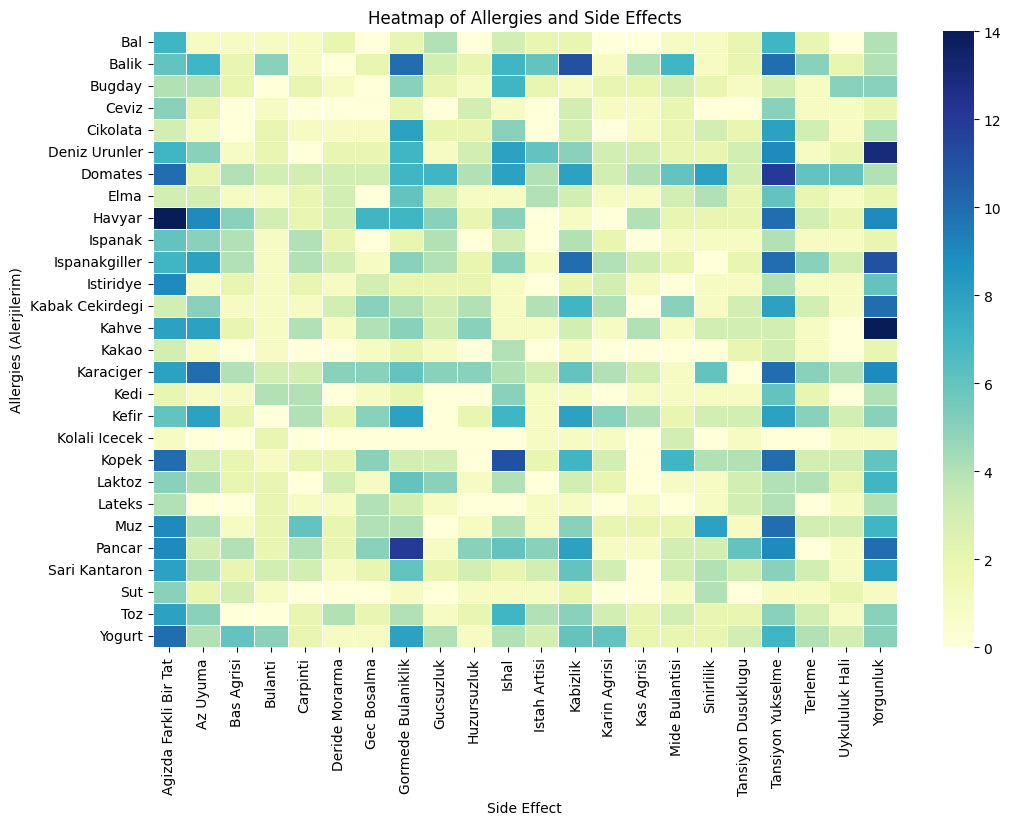

In [28]:
side_effect_allergy_cross = pd.crosstab(df['Alerjilerim'], df['Yan_Etki'])
print("\nCross-analysis of Allergies and Side Effects:")
print(side_effect_allergy_cross.head())

plt.figure(figsize=(12, 8))
sns.heatmap(side_effect_allergy_cross, cmap="YlGnBu", linewidths=0.5)
plt.title('Heatmap of Allergies and Side Effects')
plt.xlabel('Side Effect')
plt.ylabel('Allergies (Alerjilerim)')
plt.show()


Blood type and side effects cross analysis


Cross-analysis of Blood Type and Side Effects:
Yan_Etki   Agizda Farkli Bir Tat  Az Uyuma  Bas Agrisi  Bulanti  Carpinti  \
Kan Grubu                                                                   
0 RH+                         22        21           8        8        11   
0 RH-                         23        15          11        5         5   
A RH+                         19        10           1        6        10   
A RH-                         15         8           8        3         6   
AB RH+                        18        13           5        8        11   

Yan_Etki   Deride Morarma  Gec Bosalma  Gormede Bulaniklik  Gucsuzluk  \
Kan Grubu                                                               
0 RH+                   8            4                  12         11   
0 RH-                   6            9                  20         11   
A RH+                   2            5                  10          9   
A RH-                   2            4         

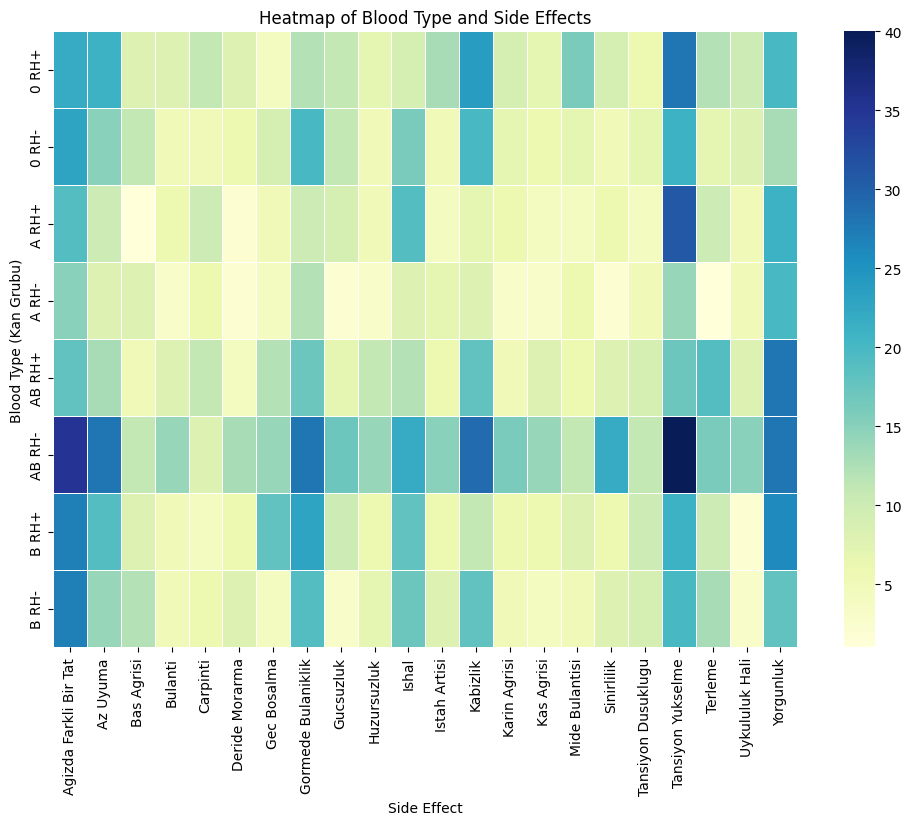

In [29]:
side_effect_blood_cross = pd.crosstab(df['Kan Grubu'], df['Yan_Etki'])
print("\nCross-analysis of Blood Type and Side Effects:")
print(side_effect_blood_cross.head())

plt.figure(figsize=(12, 8))
sns.heatmap(side_effect_blood_cross, cmap="YlGnBu", linewidths=0.5)
plt.title('Heatmap of Blood Type and Side Effects')
plt.xlabel('Side Effect')
plt.ylabel('Blood Type (Kan Grubu)')
plt.show()


City and side effects cross analysis


Cross-analysis of City and Side Effects:
Yan_Etki   Agizda Farkli Bir Tat  Az Uyuma  Bas Agrisi  Bulanti  Carpinti  \
Il                                                                          
Adana                         19         9           8        4         2   
Ankara                        12         3           6        6         6   
Antalya                       17         9           7        5         3   
Bursa                         15        15           4        6         5   
Canakkale                     22        12           6        3         5   

Yan_Etki   Deride Morarma  Gec Bosalma  Gormede Bulaniklik  Gucsuzluk  \
Il                                                                      
Adana                   3           10                  18         11   
Ankara                  3            7                  12          7   
Antalya                 5            3                  10         12   
Bursa                   2            9               

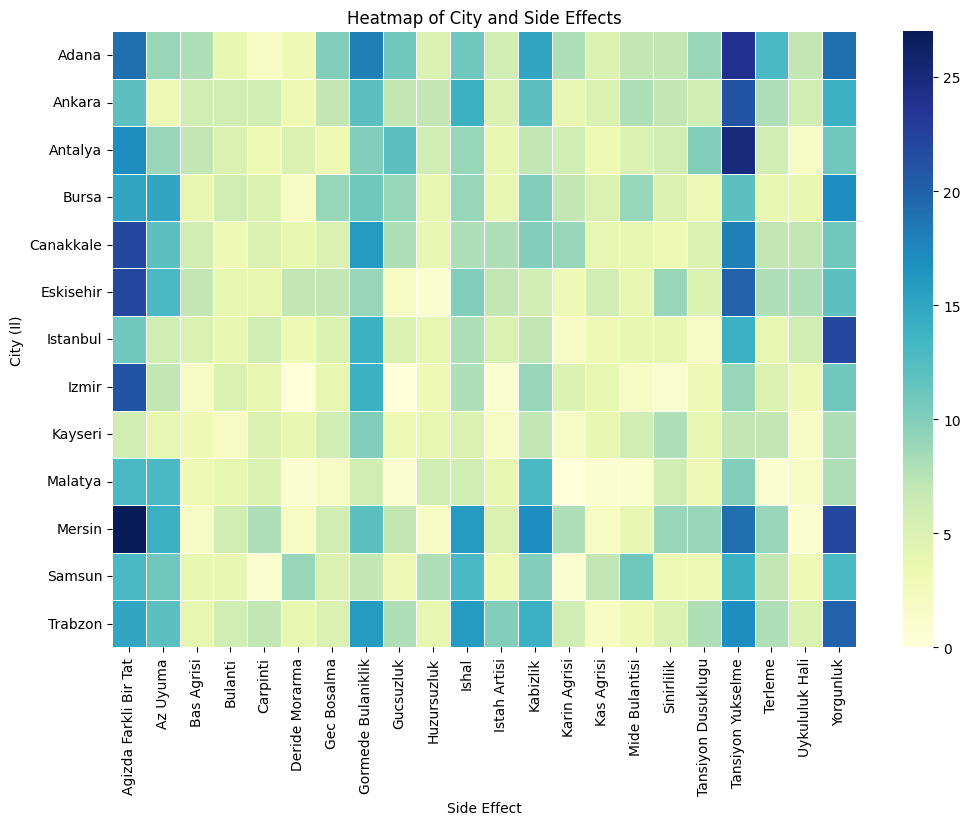

In [30]:
side_effect_city_cross = pd.crosstab(df['Il'], df['Yan_Etki'])
print("\nCross-analysis of City and Side Effects:")
print(side_effect_city_cross.head())

plt.figure(figsize=(12, 8))
sns.heatmap(side_effect_city_cross, cmap="YlGnBu", linewidths=0.5)
plt.title('Heatmap of City and Side Effects')
plt.xlabel('Side Effect')
plt.ylabel('City (Il)')
plt.show()


Cross analyisis of drug usage period and side effect
Cross analysis of side effect reporting period and side effect

---



In [31]:
#firstly calculate the durations by substracting dates from each other
df['Ilac_Baslangic_Tarihi'] = pd.to_datetime(df['Ilac_Baslangic_Tarihi'], errors='coerce')
df['Ilac_Bitis_Tarihi'] = pd.to_datetime(df['Ilac_Bitis_Tarihi'], errors='coerce')
df['Yan_Etki_Bildirim_Tarihi'] = pd.to_datetime(df['Yan_Etki_Bildirim_Tarihi'], errors='coerce')
df['Ilac_Kullanma_Suresi'] = (df['Ilac_Bitis_Tarihi'] - df['Ilac_Baslangic_Tarihi']).dt.days
df['Ilac_Bitis_YanEtki_Fark'] = (df['Yan_Etki_Bildirim_Tarihi'] - df['Ilac_Bitis_Tarihi']).dt.days


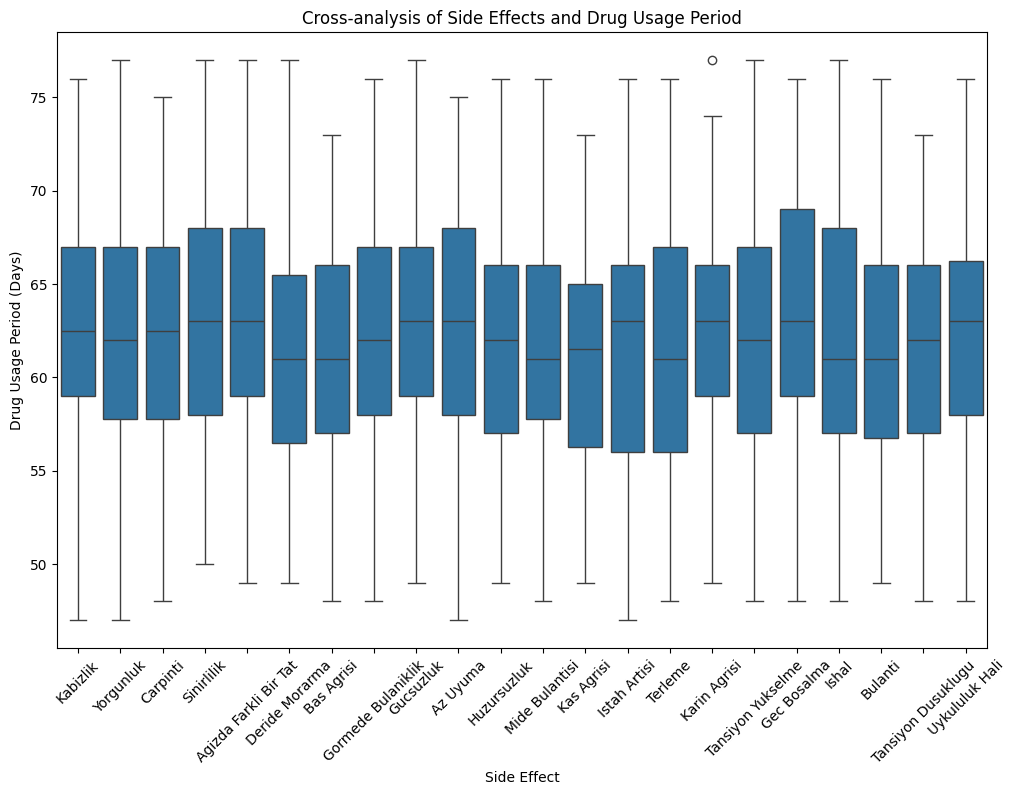

In [32]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='Yan_Etki', y='Ilac_Kullanma_Suresi', data=df)
plt.title('Cross-analysis of Side Effects and Drug Usage Period')
plt.xticks(rotation=45)
plt.ylabel('Drug Usage Period (Days)')
plt.xlabel('Side Effect')
plt.show()

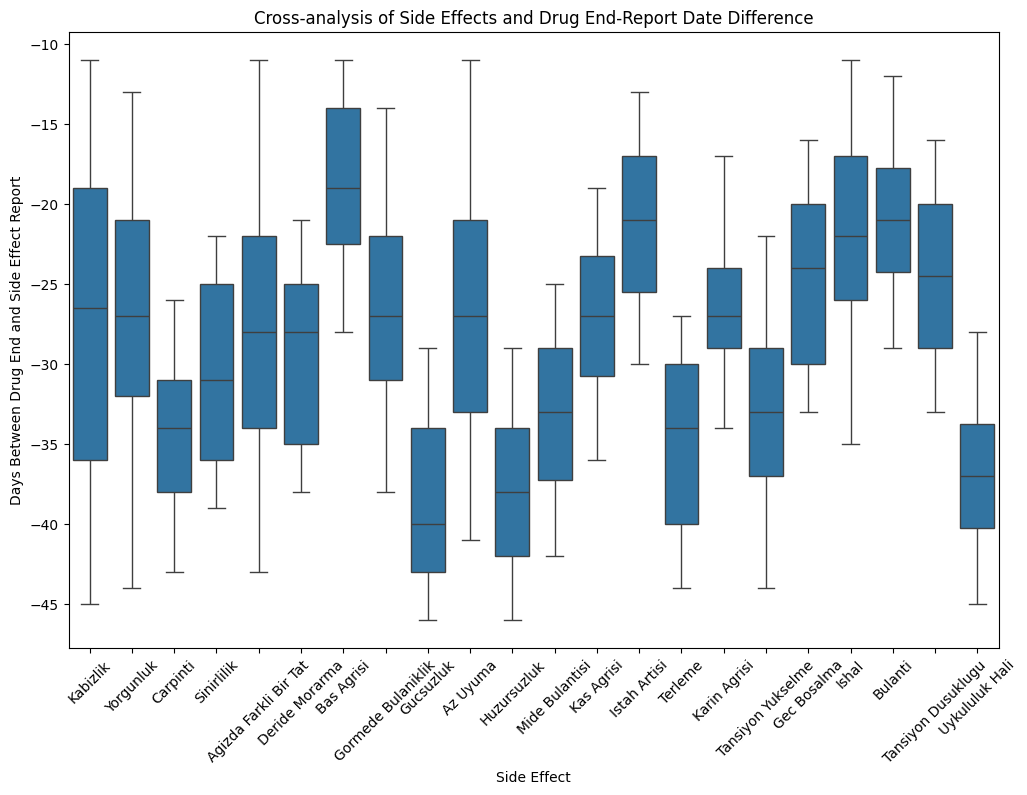

In [33]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='Yan_Etki', y='Ilac_Bitis_YanEtki_Fark', data=df)
plt.title('Cross-analysis of Side Effects and Drug End-Report Date Difference')
plt.xticks(rotation=45)
plt.ylabel('Days Between Drug End and Side Effect Report')
plt.xlabel('Side Effect')
plt.show()

Data Pre-Processing with KNNImputer and OneHotEncoder

In [42]:
import pandas as pd
from sklearn.impute import KNNImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split

df = pd.read_excel('/content/side_effect_data 1.xlsx')
print("Column Names in the Dataset:")
print(df.columns)

date_columns = ['Ilac_Baslangic_Tarihi', 'Ilac_Bitis_Tarihi', 'Yan_Etki_Bildirim_Tarihi']

for col in date_columns:
    df[col] = pd.to_datetime(df[col], errors='coerce', format='%d/%m/%Y')

#calculate new values
df['Ilac_Kullanma_Suresi'] = (df['Ilac_Bitis_Tarihi'] - df['Ilac_Baslangic_Tarihi']).dt.days
df['Ilac_Bitis_YanEtki_Fark'] = (df['Yan_Etki_Bildirim_Tarihi'] - df['Ilac_Bitis_Tarihi']).dt.days


categorical_columns = ['Alerjilerim', 'Anne Kronik Hastaliklari', 'Il', 'Ilac_Adi', 'Kan Grubu']
numerical_columns = ['Ilac_Kullanma_Suresi', 'Ilac_Bitis_YanEtki_Fark']

df_numerical = df[numerical_columns]
df_categorical = df[categorical_columns]

knn_imputer = KNNImputer(n_neighbors=5)
df_numerical_imputed = pd.DataFrame(knn_imputer.fit_transform(df_numerical), columns=numerical_columns)
#encoding
encoder = OneHotEncoder(sparse=False, drop='first')
encoded_df = pd.DataFrame(encoder.fit_transform(df_categorical),
                          columns=encoder.get_feature_names_out(categorical_columns))

df_final = pd.concat([df_numerical_imputed, encoded_df], axis=1)

scaler = StandardScaler()
df_final[numerical_columns] = scaler.fit_transform(df_final[numerical_columns])

if 'Yan_Etki' in df.columns:
    y = df['Yan_Etki']  # Target variable
else:
    print("Available columns are:", df.columns)
    y = None

if y is not None:
    X_train, X_test, y_train, y_test = train_test_split(df_final, y, test_size=0.2, random_state=42)

    print(f"Training data: {X_train.shape}")
    print(f"Test data: {X_test.shape}")


Column Names in the Dataset:
Index(['Kullanici_id', 'Cinsiyet', 'Dogum_Tarihi', 'Uyruk', 'Il', 'Ilac_Adi',
       'Ilac_Baslangic_Tarihi', 'Ilac_Bitis_Tarihi', 'Yan_Etki',
       'Yan_Etki_Bildirim_Tarihi', 'Alerjilerim', 'Kronik Hastaliklarim',
       'Baba Kronik Hastaliklari', 'Anne Kronik Hastaliklari',
       'Kiz Kardes Kronik Hastaliklari', 'Erkek Kardes Kronik Hastaliklari',
       'Kan Grubu', 'Kilo', 'Boy'],
      dtype='object')
Training data: (1885, 285)
Test data: (472, 285)


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
